Decide which metrics(attributes) to use to assess the best team performance in the regular season. These don’t have to be backed by hard-evidence, but try to use some simple graphs to show the relation between a metric and a team's win percentage. For instance, the  Pearson R metric should be able to accomplish this. 

Resource: https://www.teamrankings.com/nba/stats/ 

#### What does Pearson R Mean? 

- 1 indicates a perfect positive linear relationship.
- -1 indicates a perfect negative linear relationship.
- 0 indicates no linear relationship.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import os
import numpy as np
import matplotlib.pyplot as plt

Metric #1: Average Biggest Lead

In [6]:

# Directory paths based on your updated folder structure
drb_pct_dir = '../Cleaned_Data/abl'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'drb_pct' directory
team_files = [f for f in os.listdir(drb_pct_dir) if f.endswith('.csv')]

drb_pct_data = pd.DataFrame()

# Combine drb_pct and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    drb_pct_file = os.path.join(drb_pct_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both drb_pct and win_pct files
    drb_pct_year = pd.read_csv(drb_pct_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    drb_pct_year = drb_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'drb_pct'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(drb_pct_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    drb_pct_data = pd.concat([drb_pct_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(drb_pct_data.head(5))

# Pearson correlation coefficient
correlation = drb_pct_data['drb_pct'].corr(drb_pct_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  drb_pct  win_pct     Team
0  2005      6.8    0.159  Atlanta
1  2012     12.9    0.583  Atlanta
2  2020      8.9    0.299  Atlanta
3  2011     11.1    0.532  Atlanta
4  2007      8.6    0.366  Atlanta
Pearson Correlation Coefficient: 0.75989


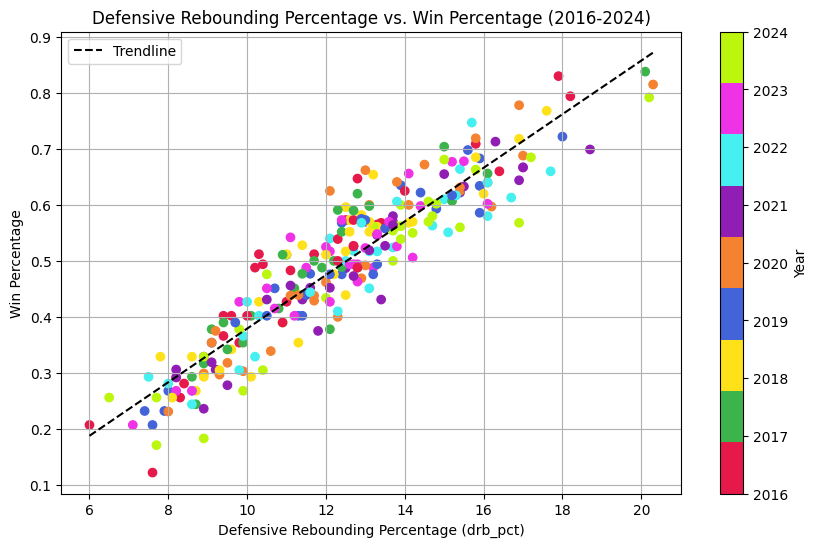

In [7]:
# Filter data for years 2016-2024 (three-point revolution)
drb_pct_data['Year'] = drb_pct_data['Year'].astype(int)
drb_pct_data = drb_pct_data[drb_pct_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(drb_pct_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
drb_pct_data['year_color'] = drb_pct_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    drb_pct_data['drb_pct'], 
    drb_pct_data['win_pct'], 
    c=drb_pct_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(drb_pct_data['drb_pct'])
sorted_drb_pct = drb_pct_data['drb_pct'].values[sorted_indices]
sorted_win_pct = drb_pct_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_drb_pct, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_drb_pct, p(sorted_drb_pct), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Defensive Rebounding Percentage (drb_pct)')
plt.ylabel('Win Percentage')
plt.title('Defensive Rebounding Percentage vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()


# Metric 2: Assists Per Posession

In [8]:

ast_pp_dir = '../Cleaned_Data/ast_pp'
win_pct_dir = '../Cleaned_Data/win_pct'

# List of team files from the 'ast_pp' directory
team_files = [f for f in os.listdir(ast_pp_dir) if f.endswith('.csv')]

ast_pp_data = pd.DataFrame()

# Combine ast_pp and win percentage data for each team
for team_file in team_files:
    # Extract team name from the file name (assuming team name is the base filename without extension)
    team_name = os.path.splitext(team_file)[0]

    ast_pp_file = os.path.join(ast_pp_dir, team_file)
    win_pct_file = os.path.join(win_pct_dir, team_file)

    # Read data from both ast_pp and win_pct files
    ast_pp_year = pd.read_csv(ast_pp_file)
    win_pct_year = pd.read_csv(win_pct_file)

    # Ensure both dataframes have the necessary columns
    ast_pp_year = ast_pp_year[['Year', 'Statistic']].rename(columns={'Statistic': 'ast_pp'})
    win_pct_year = win_pct_year[['Year', 'Statistic']].rename(columns={'Statistic': 'win_pct'})

    # Merge the dataframes on 'Year' since it's a more reliable indicator than just file names
    combined = pd.merge(ast_pp_year, win_pct_year, on='Year', how='inner')
    combined['Team'] = team_name  # Add team identifier

    # Append combined data
    ast_pp_data = pd.concat([ast_pp_data, combined], ignore_index=True)

# Check the first few rows to verify data
print(ast_pp_data.head(5))

# Pearson correlation coefficient
correlation = ast_pp_data['ast_pp'].corr(ast_pp_data['win_pct'])
print(f'Pearson Correlation Coefficient: {correlation:.5f}')

   Year  ast_pp  win_pct     Team
0  2019   0.239    0.354  Atlanta
1  2017   0.232    0.511  Atlanta
2  2013   0.251    0.523  Atlanta
3  2021   0.231    0.580  Atlanta
4  2018   0.234    0.293  Atlanta
Pearson Correlation Coefficient: 0.29193


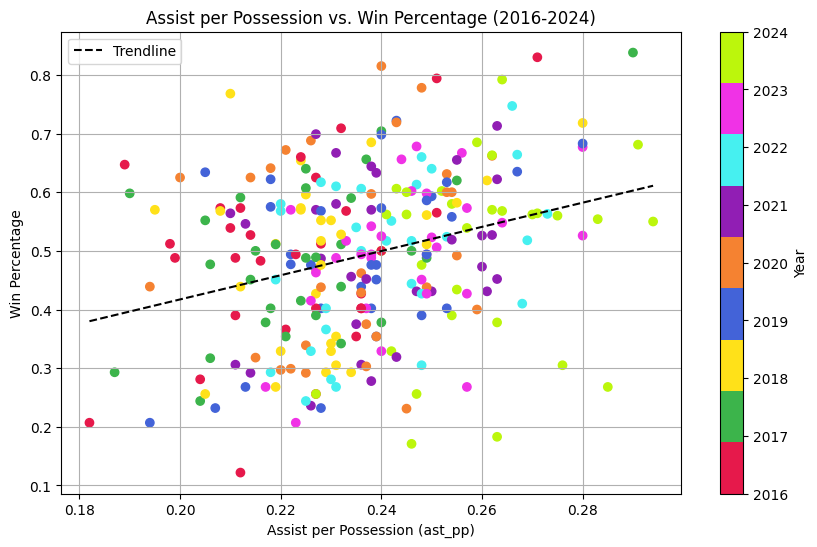

In [9]:
# Filter data for years 2016-2024 (three-point revolution)
ast_pp_data['Year'] = ast_pp_data['Year'].astype(int)
ast_pp_data = ast_pp_data[ast_pp_data['Year'].between(2016, 2024)]

# Create a list of colors for each year
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c']

# Get the unique years and sort them
unique_years = sorted(ast_pp_data['Year'].unique())

# Create a colormap using the defined colors
cmap = ListedColormap(colors[:len(unique_years)])

# Map years to indices for coloring
year_mapping = {year: idx for idx, year in enumerate(unique_years)}
ast_pp_data['year_color'] = ast_pp_data['Year'].map(year_mapping)

# Set chart size
plt.figure(figsize=(10, 6))

# Scatter plot with colors representing different years
scatter = plt.scatter(
    ast_pp_data['ast_pp'], 
    ast_pp_data['win_pct'], 
    c=ast_pp_data['year_color'], 
    cmap=cmap, 
    alpha=1.0
)

# Add color bar with year ticks
cbar = plt.colorbar(scatter, ticks=range(len(unique_years)))
cbar.set_label('Year')
cbar.set_ticks(range(len(unique_years)))
cbar.set_ticklabels(unique_years)

# Calculate and plot the trendline
# Sort the data for a proper trendline plot
sorted_indices = np.argsort(ast_pp_data['ast_pp'])
sorted_ast_pp = ast_pp_data['ast_pp'].values[sorted_indices]
sorted_win_pct = ast_pp_data['win_pct'].values[sorted_indices]

z = np.polyfit(sorted_ast_pp, sorted_win_pct, 1)
p = np.poly1d(z)
plt.plot(sorted_ast_pp, p(sorted_ast_pp), color='black', linestyle='--', label='Trendline')

# Labels and title
plt.xlabel('Assist per Possession (ast_pp)')
plt.ylabel('Win Percentage')
plt.title('Assist per Possession vs. Win Percentage (2016-2024)')
plt.grid(True)  # Enable grid for better visualization
plt.legend()
plt.show()


# Metric 3: Average Scoring Margin